In [66]:
# For our Project we have choosen this two wine datasets from Kaggle:

# White Wine Dataset: https://www.kaggle.com/datasets/piyushagni5/white-wine-quality
# Red Wine Dataset:https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [67]:
# Reading in both datasets into a Pandas DataFrame

# Reading Red Wine Dataset from Google Drive
red_wine = pd.read_csv("https://drive.google.com/uc?export=download&id=1eRcH9IRsAMzmRCNIKm4lePIVslnhxUSQ")

# Reading White Wine Dataset from Google Drive
white_wine = pd.read_csv("https://drive.google.com/uc?export=download&id=1htdZLgJU6CbQfnSuGvJOOHZUukE9_aJh")


In [68]:
##Inspect and exploring the two datasets

#Get the Shape of the red wine dataset (12 Features, 1599 Rows)
print(red_wine.shape)

#Get the Shape of the white wine dataset (12 Features, 4898 Rows)
print(white_wine.shape)



(1599, 12)
(4898, 12)


In [69]:
#Display the first entry of the red wine dataset
red_wine.head(1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
#Display the first entry of the white wine dataset
white_wine.head(1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [71]:
#Get general info of the datasets: Dtype, Non-Nulls, Columns, feature names, etc.

#Get general info of the red wine dataset
red_wine.info()

#Get general info of the red wine dataset
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [72]:
##Calculate the two DataFrame’s summary statistics

#Calculate the summary statistic of the red wine dataset
red_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [73]:
#Calculate the summary statistic of the white wine dataset
white_wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:>

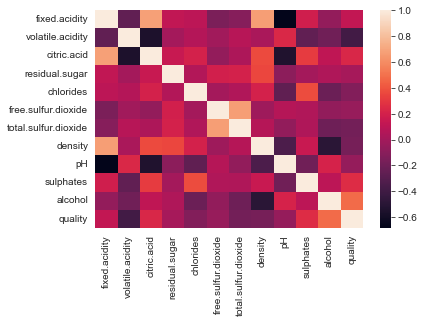

In [74]:
##Inspect the correlation of the features with a correlation heatmap

#Correlation heatmap of the red wine dataset
sns.heatmap(red_wine.corr())


<AxesSubplot:>

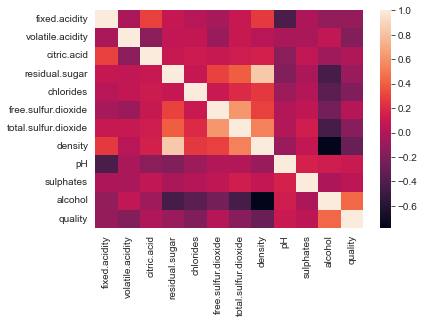

In [75]:
#Correlation heatmap of the white wine dataset
sns.heatmap(white_wine.corr())

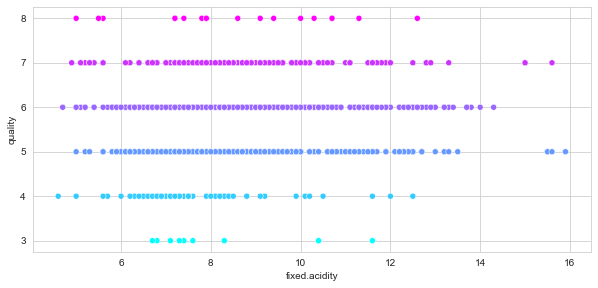

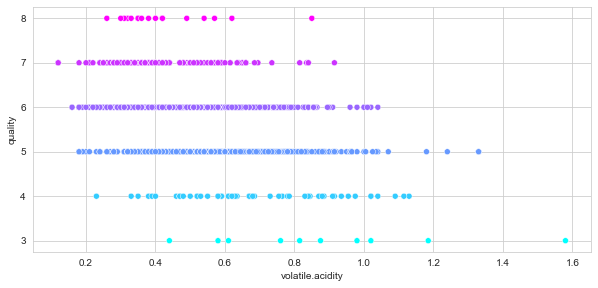

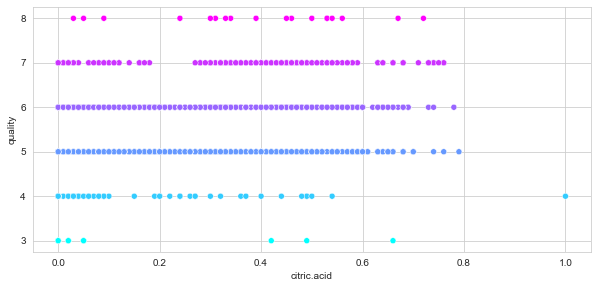

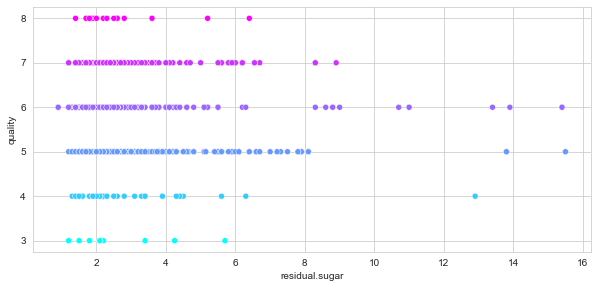

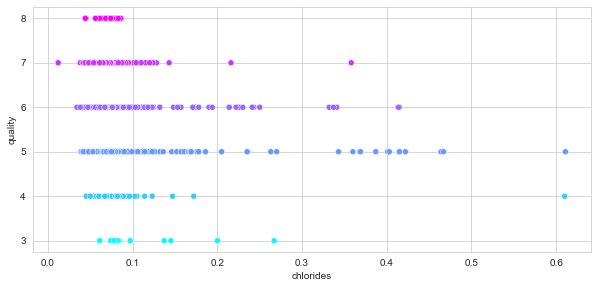

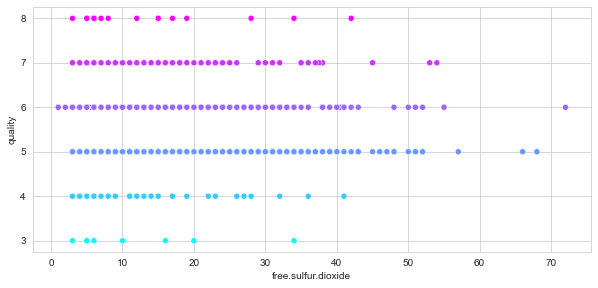

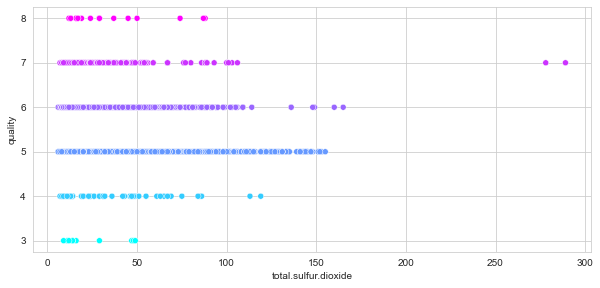

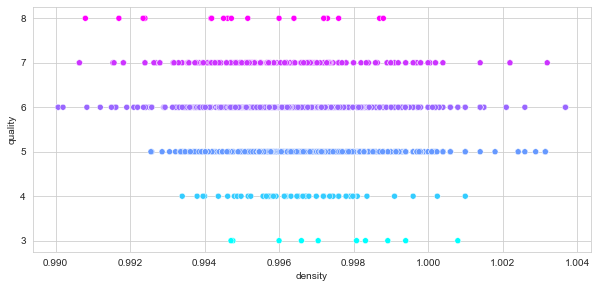

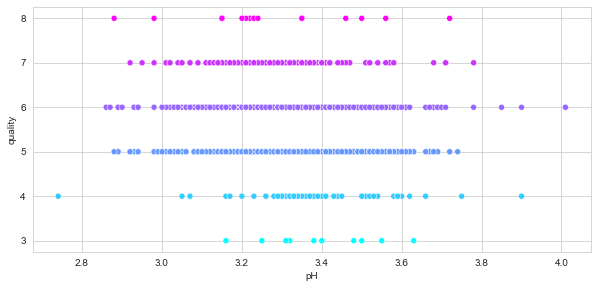

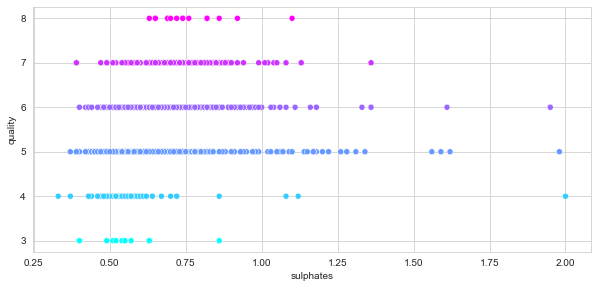

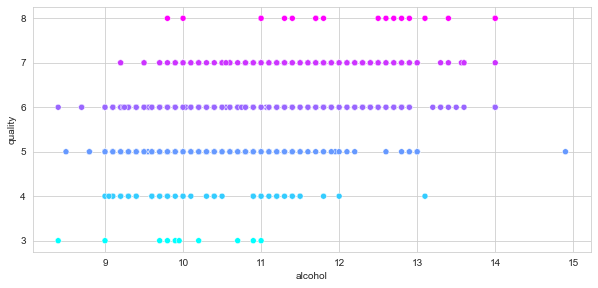

In [76]:
##Visualizing the Features: Inspect the single feaures even further with different Scatter plots

#Helpful to visualize data by plotting the target value against each feature
#Shows how wine quality relates to each feature

#Extract all the features
features_red = red_wine.columns.drop('quality')
features_white = white_wine.columns.drop('quality')

#Choose the style of the scatterplot
sns.set_style('whitegrid')

#Red Wine: Display scatter plots of several features
for feature in features_red:
    plt.figure(figsize=(10, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=red_wine, x=feature, 
                    y= 'quality', hue='quality', 
                    palette='cool', legend=False)

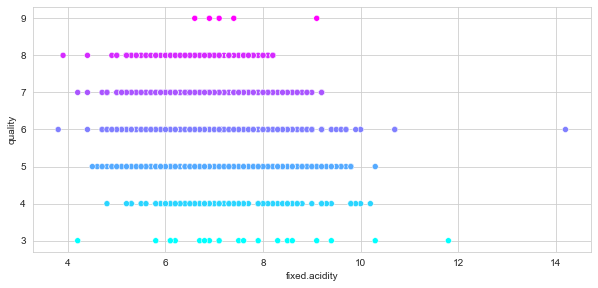

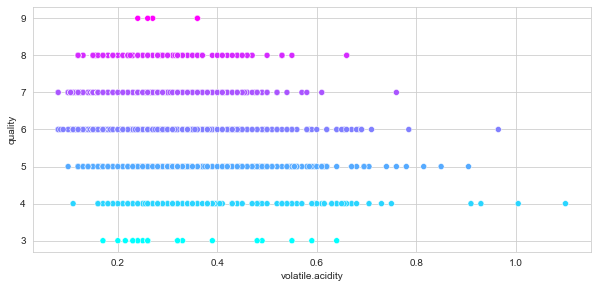

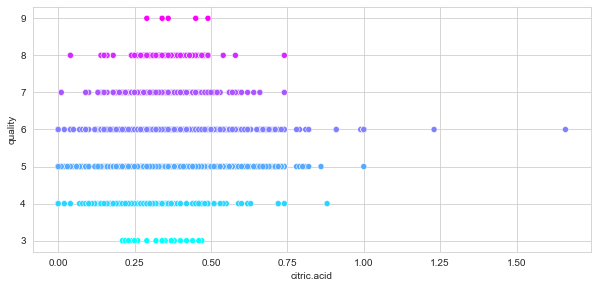

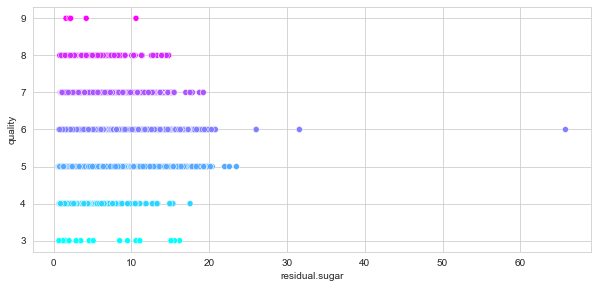

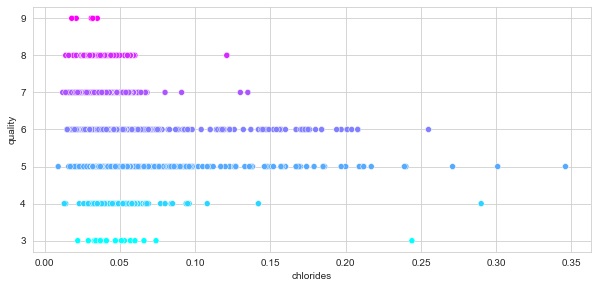

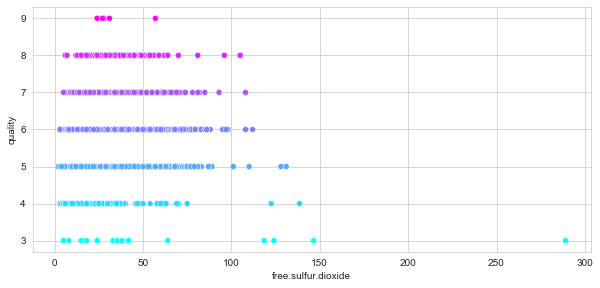

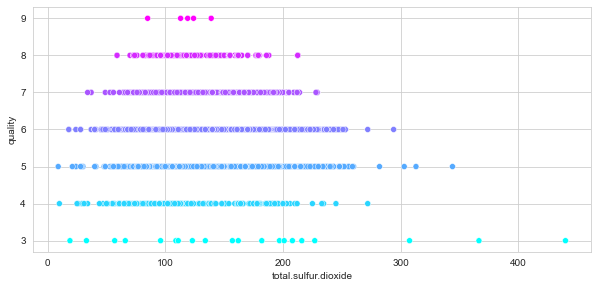

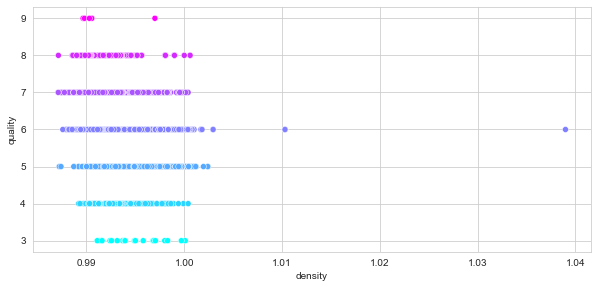

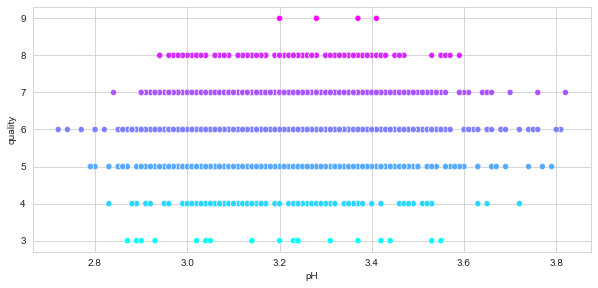

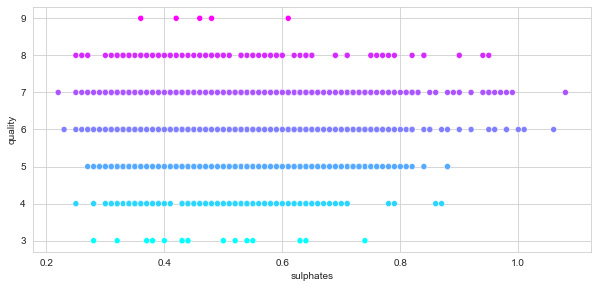

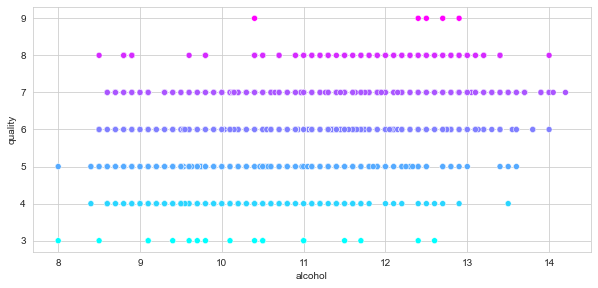

In [77]:
#White Wine: Display scatter plots of several features
for feature in features_white:
    plt.figure(figsize=(10, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=white_wine, x=feature, 
                    y= 'quality', hue='quality', 
                    palette='cool', legend=False)

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


<AxesSubplot:>

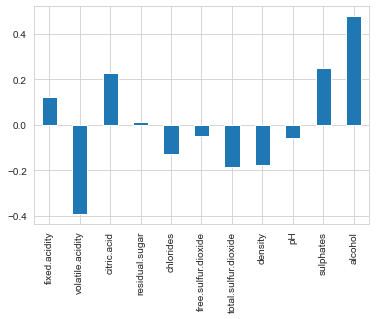

In [78]:
##Inspect the correlation coefficients in numbers and with a barplot

#Correlation coefficients of the red wine data set
red_wine_correlations = red_wine.corr()['quality'].drop('quality')
print(red_wine_correlations)

#Barplot of the correlation coefficients
red_wine_correlations.plot(kind='bar')

fixed.acidity          -0.113663
volatile.acidity       -0.194723
citric.acid            -0.009209
residual.sugar         -0.097577
chlorides              -0.209934
free.sulfur.dioxide     0.008158
total.sulfur.dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


<AxesSubplot:>

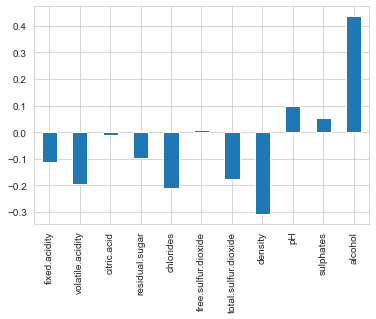

In [79]:
#Correlation coefficients of the red wine data set
white_wine_correlations = white_wine.corr()['quality'].drop('quality')
print(white_wine_correlations)

#Barplot of the correlation coefficients
white_wine_correlations.plot(kind='bar')

In [80]:
##Inspect the correlations even further with a collored heatmap table incl. correlation coeffiecients

# Correlation table for red wines
red_wine_corr = red_wine.corr()
red_wine_corr.style.background_gradient(cmap='coolwarm')

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [81]:
# Correlation table for red wines
white_wine_corr = white_wine.corr()
white_wine_corr.style.background_gradient(cmap='coolwarm')


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile.acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric.acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual.sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free.sulfur.dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total.sulfur.dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [82]:
##Preparing White Wine Dataset for the Multiple Linear Regression

# Dropping the variable density as it correlates too much and interferes with the results
White_wine = white_wine.drop("density", axis = 1)
Red_wine = red_wine.drop("density", axis = 1)

# Dropping the variable ph as it is dependent of the variables volatile and fixed acidity
White_wine = White_wine.drop("pH", axis = 1)
Red_wine = Red_wine.drop("pH", axis = 1)

In [83]:
## Creating two different datasets. One containing the independent variables and one containing the dependent one.

#Create dependent variable dataset. The "wine quality" is the dependent variable!
y = White_wine["quality"]

#Create independent variable dataset. All the remaining 11 features are the independent variables!
X = White_wine.drop("quality",axis=1)
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into 30 % test-data and 70 % training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5) #-> we have to explain why 30/70 in the script

In [56]:
#Check if the Test and Train dataset are correct and everything worked as planned!

print(X_train.shape) #70% / feature variables
print(X_test.shape)  #30% / feature variables
print(y_train.shape) #70% / target variable
print(y_test.shape)  #30% / target variable

(3428, 9)
(1470, 9)
(3428,)
(1470,)


In [84]:
##Training the Multiple Linear Regression Model on the White Wine Train dataset.

#By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
# Adding a constant, so that it also fits an intercept.
X_train = sm.add_constant(X_train, prepend=False)

# Training and fitting the multiple linear regression model
model  = sm.OLS(y_train, X_train)
model1 = model.fit()

print(model1.summary()) # Only about 27% of the variance of the quality can be explained by the model


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sun, 15 May 2022   Prob (F-statistic):          3.47e-230
Time:                        17:52:57   Log-Likelihood:                -3961.4
No. Observations:                3428   AIC:                             7943.
Df Residuals:                    3418   BIC:                             8004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed.acidity           -0.0602 

C:\Users\sandr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
##Evaluating the Multiple Linear Regression Model on the WHite Wine Test dataset.

# Adding a constant to fit the size
X_test = sm.add_constant(X_test, prepend=False)

# Making Predictions of the wine quality of the test data
predictions_white_wine = model1.predict(X_test)

# Calculating the root mean squared error to evaluate it's performance
RMSE = np.sqrt(np.mean((predictions_white_wine - y_test)**2))

RMSE #-> We need to say if that's good (it's medium)

C:\Users\sandr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.7257855549422462

In [86]:
##Preparing Red Wine Dataset for the Multiple Linear Regression
##Repeat all the stepw with the Red Wine dataset!!!

#Create dependent variable dataset. The "wine quality" is the dependent variable!
y = Red_wine["quality"]

#Create independent variable dataset. All the remaining 11 features are the independent variables!
X = Red_wine.drop("quality",axis=1)
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into 30 % test-data and 70 % training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [87]:
#Check if the Test and Train dataset are correct and everything worked as planned!

print(X_train.shape) #70% / feature variables
print(X_test.shape)  #30% / feature variables
print(y_train.shape) #70% / target variable
print(y_test.shape)  #30% / target variable

(1119, 9)
(480, 9)
(1119,)
(480,)


In [88]:
##Training the Multiple Linear Regression Model on the Red Wine Train dataset.

#By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. 
# Adding a constant, so that it also fits an intercept.
X_train = sm.add_constant(X_train, prepend=False)

# Training and fitting the multiple linear regression model
model = sm.OLS(y_train, X_train)
model2 = model.fit()

print(model2.summary()) # Only about 35% of the variance of the quality can be explained by the model

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     66.08
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.56e-97
Time:                        17:53:43   Log-Likelihood:                -1102.1
No. Observations:                1119   AIC:                             2224.
Df Residuals:                    1109   BIC:                             2274.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed.acidity            0.0364 

In [89]:
##Evaluating the Multiple Linear Regression Model on the Red Wine Test dataset.

# Adding a constant to fit the size
X_test = sm.add_constant(X_test, prepend=False)

# Making Predictions of the wine quality of the test dataset
predictions_red_wine = model2.predict(X_test)

# Calculating the root mean squared error to evaluate it's performance
RMSE = np.sqrt(np.mean((predictions_red_wine - y_test)**2))

RMSE #-> We need to say if that's good (it's okay)

C:\Users\sandr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.6500780804966898

In [90]:
#Now we finally get to the important questions that students are most interested in: 

#Which wine of the 6495 wines in the two datasets has the highest alcohol content?

all_wines = pd.merge(white_wine, red_wine, on = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'], how = 'outer')

print(all_wines["alcohol"].max())

#Is it a red wine or a white wine?
print(white_wine["alcohol"].max())
print(red_wine["alcohol"].max()) #It's a red wine!!!

#The wine with the highest alcohol content is... "drum roll":
winner = all_wines.loc[all_wines['alcohol'] == 14.9]
winner

14.9
14.2
14.9


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
5552,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


In [91]:
#Check Model Parameters for Wine Quality Predicter Web Application
model1.params #White Wine

fixed.acidity          -0.060157
volatile.acidity       -1.910340
citric.acid            -0.012632
residual.sugar          0.023824
chlorides              -1.793469
free.sulfur.dioxide     0.004697
total.sulfur.dioxide   -0.000531
sulphates               0.416117
alcohol                 0.370318
const                   2.578745
dtype: float64

In [92]:
#Check Model Parameters for Wine Quality Predicter Web Application
model2.params #Red Wine

fixed.acidity           0.036430
volatile.acidity       -1.178876
citric.acid            -0.090977
residual.sugar          0.005276
chlorides              -1.712330
free.sulfur.dioxide     0.002817
total.sulfur.dioxide   -0.002601
sulphates               0.823083
alcohol                 0.269529
const                   2.824479
dtype: float64